In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [3]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [4]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [5]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [6]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [7]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [8]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [9]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [10]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [11]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [12]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
training_reviews[:10]

[' i did not like the fact that for  days friday saturday and sunday the lift was out of service and waited until monday to fix it even i helped some new arrivals to the hotel with their suite cases up the stairs because they were ladies and others old people i did not like the extra charge the hotel demanded even being little because the room price they charge should include the extra food they charge for it in conclusion i will never go back to this hotel even if they charge me half of the price i paid last time ',
 ' the stuff are nice people specially at the restaurant and the bar the reception stuff are nice but their english is poor somehow i think the price they charge should be lower even though it is close to central london because a much better quality hotel in a better position and better quality services and food charge close to this hotel charges i will never',
 ' nothing ',
 ' everything ',
 ' food was good the set up was a little long winded in terms of  for one area  fo

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [15]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10789 unique tokens.
Shape of data tensor: (16815, 1000)
Shape of label tensor: (16815, 2)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)


In [17]:
from gensim.models import KeyedVectors

In [18]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2024-02-28 16:55:58--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.70, 13.227.219.10, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.21’

wiki-news-300d-1M.v 100%[===================>] 650.22M  49.3MB/s    in 13s     

2024-02-28 16:56:11 (50.9 MB/s) - ‘wiki-news-300d-1M.vec.zip.21’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: wiki-news-300d-1M.vec   

In [19]:
!wc -l wiki-news-300d-1M.vec

98186 wiki-news-300d-1M.vec


In [20]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', limit=206)

In [21]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 500
print('Preparing embedding matrix.fast text')

# Prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft:
        embedding_vector = model_ft[word]
        embedding_vector = np.array(embedding_vector)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)


Preparing embedding matrix.fast text
(500, 300)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.initializers import Constant

print('Training model.')

# define the model
model = Sequential()
model.add(Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# summarize the model
print(model.summary())

model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          validation_data=(x_train, y_train))

Training model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         150000    
                                                                 
 flatten (Flatten)           (None, 300000)            0         
                                                                 
 dense (Dense)               (None, 512)               153600512 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 153914994 (587.14 MB)
Trai

In [23]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.815630
Loss: 0.375147


In [24]:
#model.most_similar(positive="dinner")
#from keras.preprocessing.text import Tokenizer
model.save_weights("model.h5")


In [25]:
from keras.preprocessing.text import text_to_word_sequence
import keras

In [26]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(training_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        training_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [27]:
from tensorflow.keras.layers import Bidirectional,Conv1D,LSTM,MaxPooling1D,Dropout
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import backend
maxlen=40
max_features=40000
batch_size=32

print('Pad sequences (samples x time)')
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Pad sequences (samples x time)
X_train shape: (11266, 40)
X_test shape: (5549, 40)


In [28]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=[X_test, y_test])

Epoch 1/5
353/353 [==============================] - 74s 188ms/step - loss: 0.3142 - accuracy: 0.8615 - val_loss: 0.2194 - val_accuracy: 0.9140
Epoch 2/5
353/353 [==============================] - 57s 162ms/step - loss: 0.2062 - accuracy: 0.9209 - val_loss: 0.2162 - val_accuracy: 0.9187
Epoch 3/5
353/353 [==============================] - 52s 146ms/step - loss: 0.1905 - accuracy: 0.9255 - val_loss: 0.2133 - val_accuracy: 0.9180
Epoch 4/5
353/353 [==============================] - 52s 146ms/step - loss: 0.1815 - accuracy: 0.9266 - val_loss: 0.2098 - val_accuracy: 0.9182
Epoch 5/5
353/353 [==============================] - 50s 142ms/step - loss: 0.1694 - accuracy: 0.9323 - val_loss: 0.2266 - val_accuracy: 0.9155


Epoch 1/4
353/353 [==============================] - 49s 139ms/step - loss: 0.1650 - accuracy: 0.9348 - val_loss: 0.2236 - val_accuracy: 0.9185
Epoch 2/4
353/353 [==============================] - 52s 147ms/step - loss: 0.1590 - accuracy: 0.9377 - val_loss: 0.2196 - val_accuracy: 0.9166
Epoch 3/4
353/353 [==============================] - 53s 149ms/step - loss: 0.1519 - accuracy: 0.9393 - val_loss: 0.2267 - val_accuracy: 0.9171
Epoch 4/4
353/353 [==============================] - 50s 142ms/step - loss: 0.1426 - accuracy: 0.9416 - val_loss: 0.2370 - val_accuracy: 0.9119


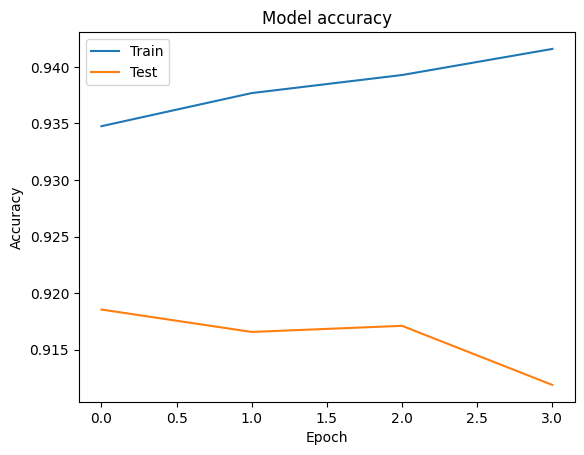

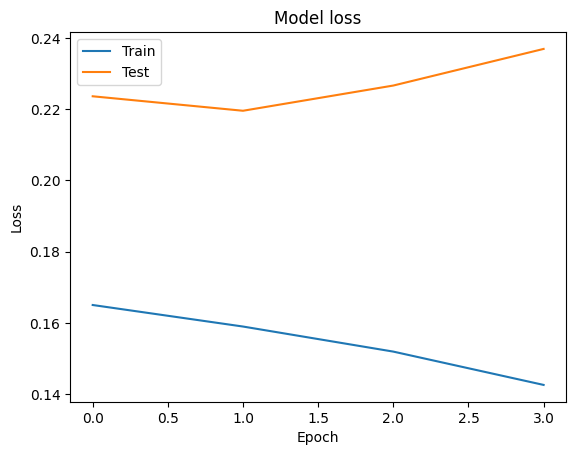

In [30]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [31]:
 loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

174/174 [==============================] - 3s 15ms/step - loss: 0.2370 - accuracy: 0.9119
Test Loss: 0.23695534467697144
Test Accuracy: 0.9118760228157043


174/174 [==============================] - 6s 27ms/step


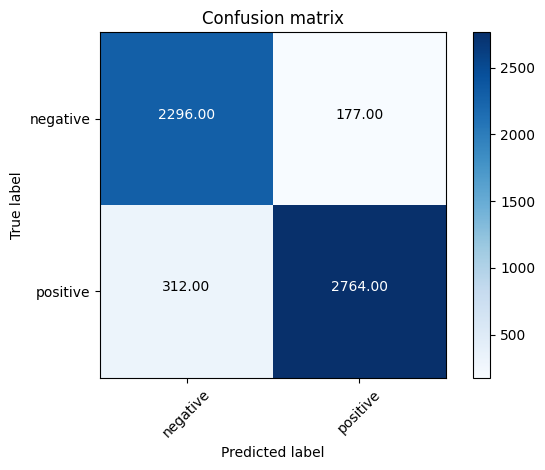

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Getting predictions using the model
predictions = np.round(model.predict(X_test)).astype(int)

# Computing confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Adding text annotations
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [33]:
report = classification_report(y_test, predictions, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2473
           1       0.94      0.90      0.92      3076

    accuracy                           0.91      5549
   macro avg       0.91      0.91      0.91      5549
weighted avg       0.91      0.91      0.91      5549



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert continuous predictions to binary labels
binary_predictions = (predictions > 0.5).astype('int32')

# Compute metrics
accuracy = accuracy_score(y_test, binary_predictions)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, binary_predictions)
print('Precision: %f' % precision)

recall = recall_score(y_test, binary_predictions)
print('Recall: %f' % recall)

f1 = f1_score(y_test, binary_predictions)
print('F1 score: %f' % f1)


Accuracy: 0.911876
Precision: 0.939816
Recall: 0.898570
F1 score: 0.918730


Matthews Correlation Coefficient: 0.8235834918008946


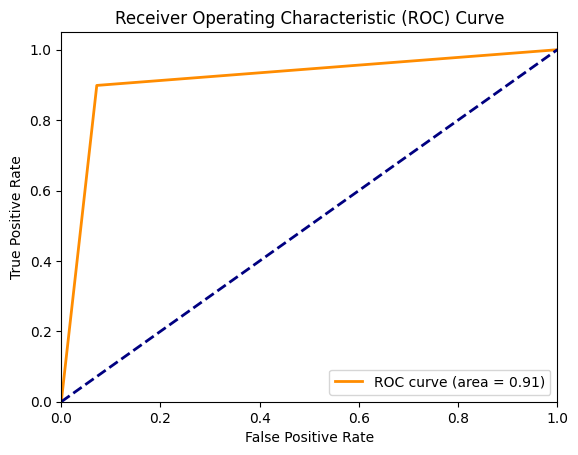

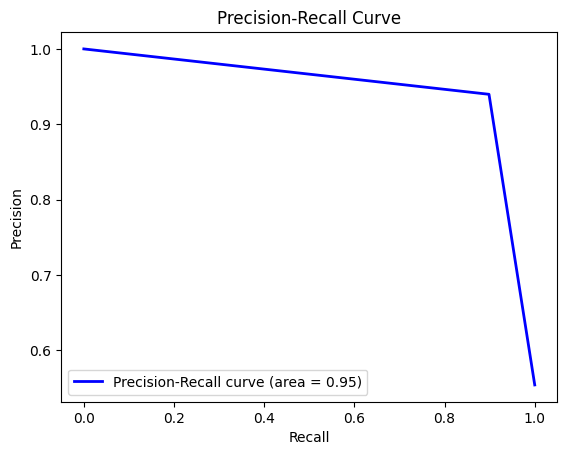

In [38]:
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Make sure the predictions are converted to binary labels
binary_predictions = (predictions > 0.5).astype('int32')

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, binary_predictions)
print("Matthews Correlation Coefficient:", mcc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


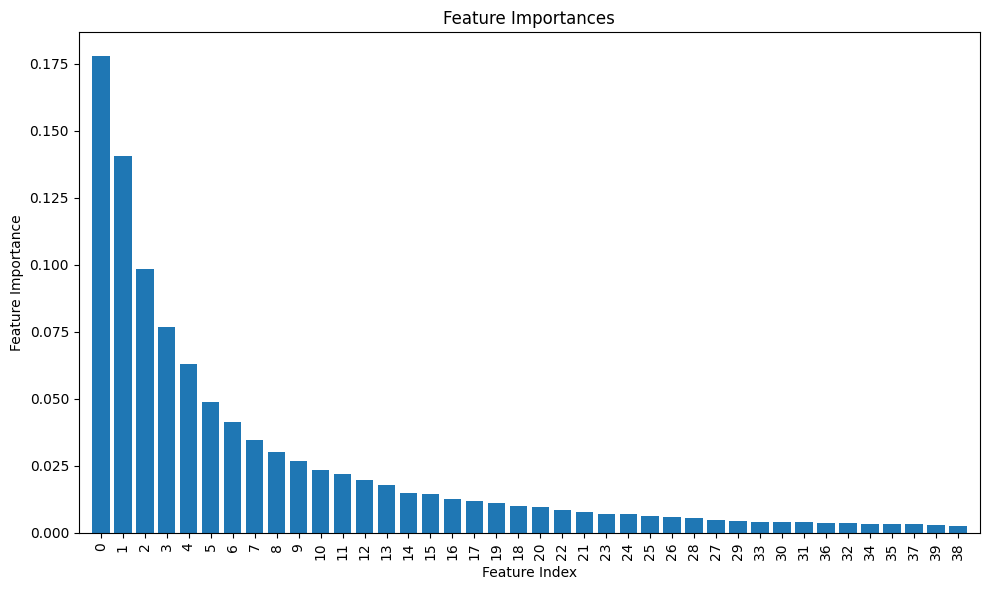

In [35]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a RandomForestClassifier model named 'model'
# If you're using a different model, adjust accordingly
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation=90)  # Use indices as labels
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title("Feature Importances")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
